In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import scipy
from typing import List
!pip install line_profiler
%load_ext line_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


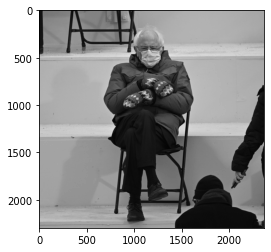

In [2]:
bgr_bernie = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Computer Vision/CW2/bernie.jpeg")
rgb_bernie = cv2.cvtColor(bgr_bernie, cv2.COLOR_BGR2RGB)
gray_bernie = cv2.cvtColor(rgb_bernie, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_bernie, cmap='gray')

In [3]:
def plot_image_row(title: str, images: dict) -> None:
  """
  Function takes in a dictionary of iamges to plot
  with format {'plot_title': np.ndarray}
  """
  fig = plt.figure(figsize = (4*len(images),5))
  fig.suptitle(title, fontsize=16)
  for i, img_key in enumerate(images.keys()):
    ax = fig.add_subplot(1,len(images),i+1)
    ax.axis('off')
    ax.imshow(images[img_key], cmap='gray')
    ax.set_title(img_key)
  plt.show()

# 1. Interest point (Keypoint) Detection [9 marks]

## 1.1 Define Harris Corner Detector [7 marks]

In [4]:
ALPHA = 0.05
def HarrisPointsDetector(gray_img: np.ndarray) -> np.ndarray:
  blurred_gray_img = scipy.ndimage.gaussian_filter(gray_img, sigma=0.5,
                                                   output=np.float32)
  Ix = scipy.ndimage.sobel(blurred_gray_img, 1)
  Iy = scipy.ndimage.sobel(blurred_gray_img, 0)
  Ix_squared = Ix**2
  Iy_squared = Iy**2
  IxIy = Ix*Iy
  gIx_squared = scipy.ndimage.gaussian_filter(Ix_squared, sigma=0.5, radius=2)
  gIy_squared = scipy.ndimage.gaussian_filter(Iy_squared, sigma=0.5, radius=2)
  gIxIy = scipy.ndimage.gaussian_filter(IxIy, sigma=0.5, radius=2)
  # plot_image_row("Intermediate results", {"g(Ix)^2":gIx_squared,
  #                                         "g(Iy)^2":gIy_squared,
  #                                         "g(Ix*Iy)":gIxIy})
  R = gIx_squared*gIy_squared-gIxIy**2-ALPHA*(gIx_squared+gIy_squared)**2
  supressed_R = scipy.ndimage.maximum_filter(R, size=7)
  detected_kp_list = []
  angles = np.arctan2(Iy, Ix)
  for y, row in enumerate(supressed_R):
    for x, px in enumerate(row):
      kp = cv2.KeyPoint(x,y,size=10,
                        response=supressed_R[y,x],
                        angle=angles[y,x])
      detected_kp_list.append(kp)
  return sorted(detected_kp_list, key=lambda kp: kp.response, reverse=True)

In [5]:
my_detected_kp = HarrisPointsDetector(gray_bernie)

In [6]:
"Keypoints have been detected:", len(my_detected_kp)

('Keypoints have been detected:', 5443816)

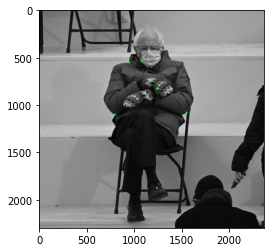

(<matplotlib.image.AxesImage at 0x7f44b80f7700>, None)

In [7]:
gray_bernie_w_harris = cv2.drawKeypoints(gray_bernie, my_detected_kp[:500], None, color=(0,255,0),
                                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(gray_bernie_w_harris), plt.show()

## 1.2 Threshold strongest points [2 marks]
Plot the effect of different threshold values

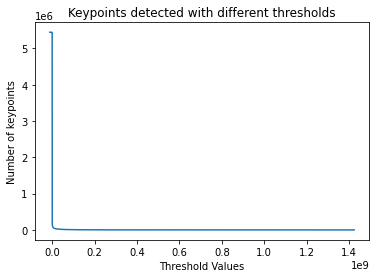

In [8]:
plt.title("Keypoints detected with different thresholds")
plt.xlabel("Threshold Values")
plt.ylabel("Number of keypoints")
y = np.array([len(my_detected_kp)-i for i in range(len(my_detected_kp))])
x = np.array([kp.response for kp in reversed(my_detected_kp)])
plt.plot(x,y)

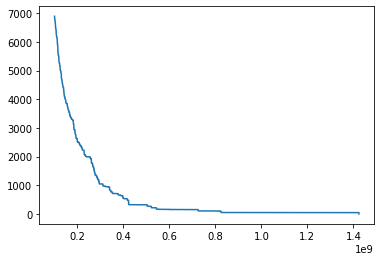

In [9]:
greater_than_0 = x>1e8
plt.plot(x[greater_than_0],y[greater_than_0])

# 2. Feature Description [2 marks]

### 2.1 Using Built-In Methods

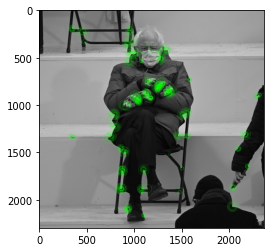

(<matplotlib.image.AxesImage at 0x7f44aa699940>, None)

In [10]:
orb = cv2.ORB_create(nfeatures=500, scoreType=cv2.ORB_HARRIS_SCORE)
harris_kp = orb.detect(gray_bernie,None)
harris_kp, des = orb.compute(gray_bernie, harris_kp)
gray_bernie_w_harris = cv2.drawKeypoints(gray_bernie, harris_kp, None, color=(0,255,0),
                                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(gray_bernie_w_harris), plt.show()

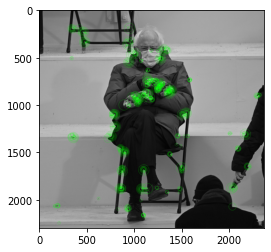

(<matplotlib.image.AxesImage at 0x7f44b814b250>, None)

In [11]:
orb = cv2.ORB_create(nfeatures=500, scoreType=cv2.ORB_FAST_SCORE)
fast_kp = orb.detect(gray_bernie,None)
fast_kp, des = orb.compute(gray_bernie, fast_kp)
img2 = cv2.drawKeypoints(gray_bernie, fast_kp, None, color=(0,255,0),
                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img2), plt.show()

### 2.2 Using Keypoints Detected By Me

In [12]:
def featureDescriptor(kp, img):
  orb = cv2.ORB_create(nfeatures=500)
  kp, descriptors = orb.compute(img, kp[:500])
  return kp, descriptors

(< cv2.KeyPoint 0x7f44b8141a50>, < cv2.KeyPoint 0x7f44b8141f30>, < cv2.KeyPoint 0x7f44b8141930>, < cv2.KeyPoint 0x7f44b7f7cf30>, < cv2.KeyPoint 0x7f44b7f7cd80>, < cv2.KeyPoint 0x7f44b7f7c6c0>, < cv2.KeyPoint 0x7f44b7f7c3c0>, < cv2.KeyPoint 0x7f44b7f7c480>, < cv2.KeyPoint 0x7f44b7f7c510>, < cv2.KeyPoint 0x7f44b7f7c540>, < cv2.KeyPoint 0x7f44b7f7c420>, < cv2.KeyPoint 0x7f44b7f7c720>, < cv2.KeyPoint 0x7f44b7f7c6f0>, < cv2.KeyPoint 0x7f44b7f7c7e0>, < cv2.KeyPoint 0x7f44b7f7c840>, < cv2.KeyPoint 0x7f44b7f7cfc0>, < cv2.KeyPoint 0x7f44b7f7c810>, < cv2.KeyPoint 0x7f44b7f7cc60>, < cv2.KeyPoint 0x7f44b7f7cb10>, < cv2.KeyPoint 0x7f44b7f7c4b0>, < cv2.KeyPoint 0x7f44b7f7cbd0>, < cv2.KeyPoint 0x7f44b7f7ce70>, < cv2.KeyPoint 0x7f44b7f7cc90>, < cv2.KeyPoint 0x7f44aa6f2e40>, < cv2.KeyPoint 0x7f44aa6f2ed0>, < cv2.KeyPoint 0x7f44aa6f2900>, < cv2.KeyPoint 0x7f44aa6f2780>, < cv2.KeyPoint 0x7f44aa6f2d20>, < cv2.KeyPoint 0x7f44aa6f2270>, < cv2.KeyPoint 0x7f44aa6f2150>, < cv2.KeyPoint 0x7f44aa6f22a0>, < cv2.K

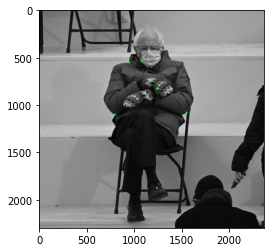

(<matplotlib.image.AxesImage at 0x7f44b80b5f40>, None)

In [13]:
train_kp, train_descriptors = featureDescriptor(my_detected_kp[:500],gray_bernie)
print(train_kp, train_descriptors)
print('descriptors.shape', train_descriptors.shape)
img2 = cv2.drawKeypoints(gray_bernie, train_kp, None, color=(0,255,0),
                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img2), plt.show()

# 3. Feature Matching [2 marks]

## 3.1 Define FN

In [15]:
# def SSDFeatureMatcher(desc_a: np.ndarray, desc_b: np.ndarray) -> float:
#   # dist = scipy.spatial.distance.cdist(desc_a, desc_b)
#   dist = np.sum((desc_a-desc_b)**2)
#   return dist+1
# def matchFeatures(descs_a: np.ndarray, descs_b: np.ndarray, dist_fn=SSDFeatureMatcher) -> List[cv2.DMatch]:
#   best_matches = []
#   for i_a, desc_a in enumerate(descs_a):
#     dist = dist_fn(desc_a, descs_b[0])
#     best_match = cv2.DMatch(i_a, 0, _distance=dist)
#     for i_b, desc_b in enumerate(descs_b):
#       dist = dist_fn(desc_a, desc_b)
#       new_match = cv2.DMatch(i_a, i_b, _distance=dist)
#       if new_match.distance < best_match.distance:
#         best_match = new_match
#     best_matches.append(best_match)
#   return best_matches

In [16]:
# def matchFeatures(descs_a: np.ndarray, descs_b: np.ndarray, dist_fn=SSDFeatureMatcher) -> List[cv2.DMatch]:
#   best_matches = []
#   for i_a, desc_a in enumerate(descs_a):
#     dist = dist_fn(desc_a, descs_b[0])
#     best_match = cv2.DMatch(i_a, 0, _distance=dist)
#     for i_b, desc_b in enumerate(descs_b):
#       dist = dist_fn(desc_a, desc_b)
#       new_match = cv2.DMatch(i_a, i_b, _distance=dist)
#       if new_match.distance < best_match.distance:
#         best_match = new_match
#     best_matches.append(best_match)
#   return best_matches

In [36]:
def SSDFeatureMatcher(descs_a: np.ndarray, descs_b: np.ndarray) -> List[cv2.DMatch]:
  # dist = scipy.spatial.distance.cdist(desc_a, desc_b)
  dist_matrix = scipy.spatial.distance.cdist(descs_a, descs_b)
  optimal_assignment = np.argmin(dist_matrix, axis=1)
  # optimal_assignment = scipy.optimize.linear_sum_assignment(dist_matrix)[1]
  output = []
  for i, j in enumerate(optimal_assignment):
    match_obj = cv2.DMatch(_queryIdx=i,_trainIdx=j,_distance=dist_matrix[i,j])
    output.append(match_obj)
  return output

In [41]:
def RatioFeatureMatcher(descs_a: np.ndarray, descs_b: np.ndarray) -> List[cv2.DMatch]:
  dist_matrix = scipy.spatial.distance.cdist(descs_a, descs_b)
  output = []
  for i, row in enumerate(dist_matrix):
    sorted_idx_in_row = row.argsort()
    ratio = dist_matrix[i, sorted_idx_in_row[0]] / dist_matrix[i, sorted_idx_in_row[1]]
    match_obj = cv2.DMatch(_queryIdx=i,_trainIdx=sorted_idx_in_row[0],
                           _distance=ratio)
    output.append(match_obj)
  return output

In [42]:
def matchFeatures(descs_a: np.ndarray, descs_b: np.ndarray, matcher) -> List[cv2.DMatch]:
  best_matches = matcher(descs_a, descs_b) 
  return best_matches

## 3.2 Match features

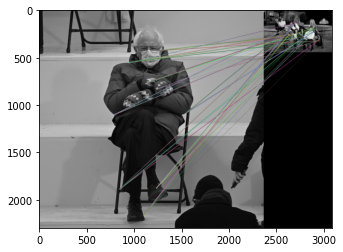

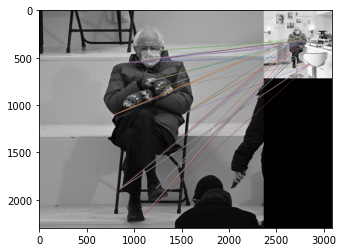

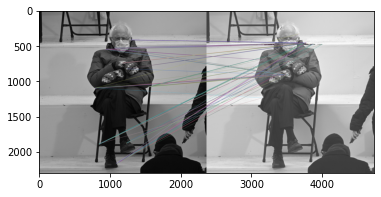

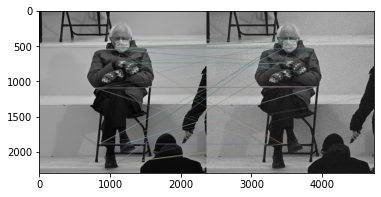

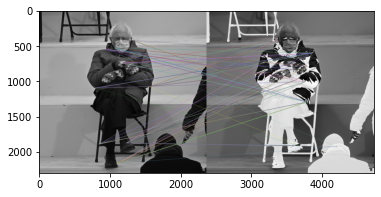

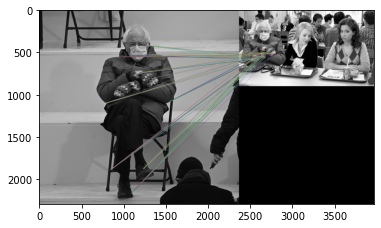

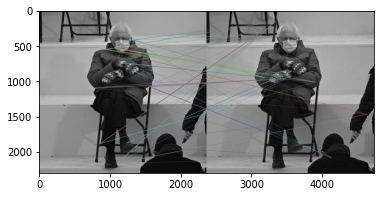

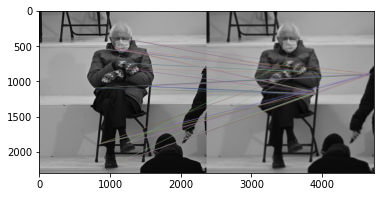

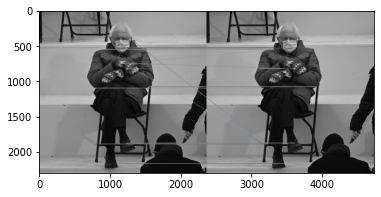

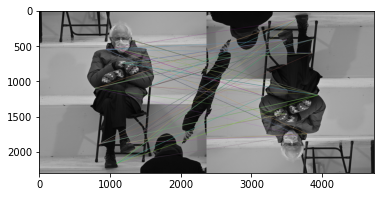

In [43]:
TEST_DIR = "/content/drive/MyDrive/Colab Notebooks/Computer Vision/CW2/vars"
for file in os.listdir(TEST_DIR):
  rgb_test_img = cv2.imread(os.path.join(TEST_DIR, file))
  gray_test_img = cv2.cvtColor(rgb_test_img, cv2.COLOR_BGR2GRAY)
  test_kp = HarrisPointsDetector(gray_test_img)
  test_kp, test_descriptors = featureDescriptor(test_kp[:500], gray_test_img)
  test_with_kp = cv2.drawKeypoints(gray_test_img, test_kp, None, color=(0,255,0),
                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  matches = matchFeatures(train_descriptors, test_descriptors,
                          RatioFeatureMatcher)
  matches = sorted(matches, key=lambda x:x.distance)
  match_image = cv2.drawMatches(gray_bernie,train_kp,
                                gray_test_img,test_kp,matches,None,
                                flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  plt.imshow(match_image) 
  plt.show()